In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
products = pd.read_csv('products.csv')
order_items = pd.read_csv('order_items.csv')
orders = pd.read_csv('orders.csv')

In [3]:
# revenue 데이터 생성
using_merge_data = pd.merge(
    order_items[~order_items['status'].isin(['Cancelled','Returned'])],
    orders,
    how='inner',
    on='order_id'
)
using_merge_data['revenue'] = round(using_merge_data['num_of_item'] * using_merge_data['sale_price'])
order_data = using_merge_data[['order_id','product_id','revenue']]

---

# 1. 파레토 차트
- 정리 링크 : https://velog.io/@suminwooo/%ED%8C%8C%EB%A0%88%ED%86%A0-%EC%B0%A8%ED%8A%B8

### 파레토 법칙
- 80:20 법칙이라고도 불리는데, 80%의 결과가 20%의 원인에 의해 발생한다는 법칙

### 파레토 차트
파레토 차트는 막대와 선 그래프가 모두 포함된 차트 유형으로, 개별 값은 막대로 내림차순으로 표시되고 누적 합계는 선으로 표시됩니다.
- 축 설명
  - 왼쪽축은 발생 빈도, 비용이나 중요한 측정 단위를 나타낼 수도 있음
  - 오른쪽축은 총 빈도, 비용 또는 측정 단위의 총계에 대한 누적 백분율
- 목적 : 요인 집합 중에서 가장 중요한 것을 강조하는 것
- 이점
  - 우선순위 선택
  - 관리 가능한 부분으로 분류
  - 생산성 증가
 

In [4]:
using_data = pd.merge(
    order_data, 
    products, 
    how='left', 
    left_on='product_id', right_on='id'
)[['order_id','category']]

In [5]:
using_data.head()

,order_id,category
0,86167,Accessories
1,62274,Accessories
2,105087,Accessories
3,88683,Accessories
4,109541,Accessories


In [6]:
# 빈도 계산
count_data = using_data['category'].value_counts()

In [7]:
# x축 설정
x = count_data.index

# y축 설정
y = count_data.values

# 비율 설정
ratio = (y/y.sum()).cumsum()

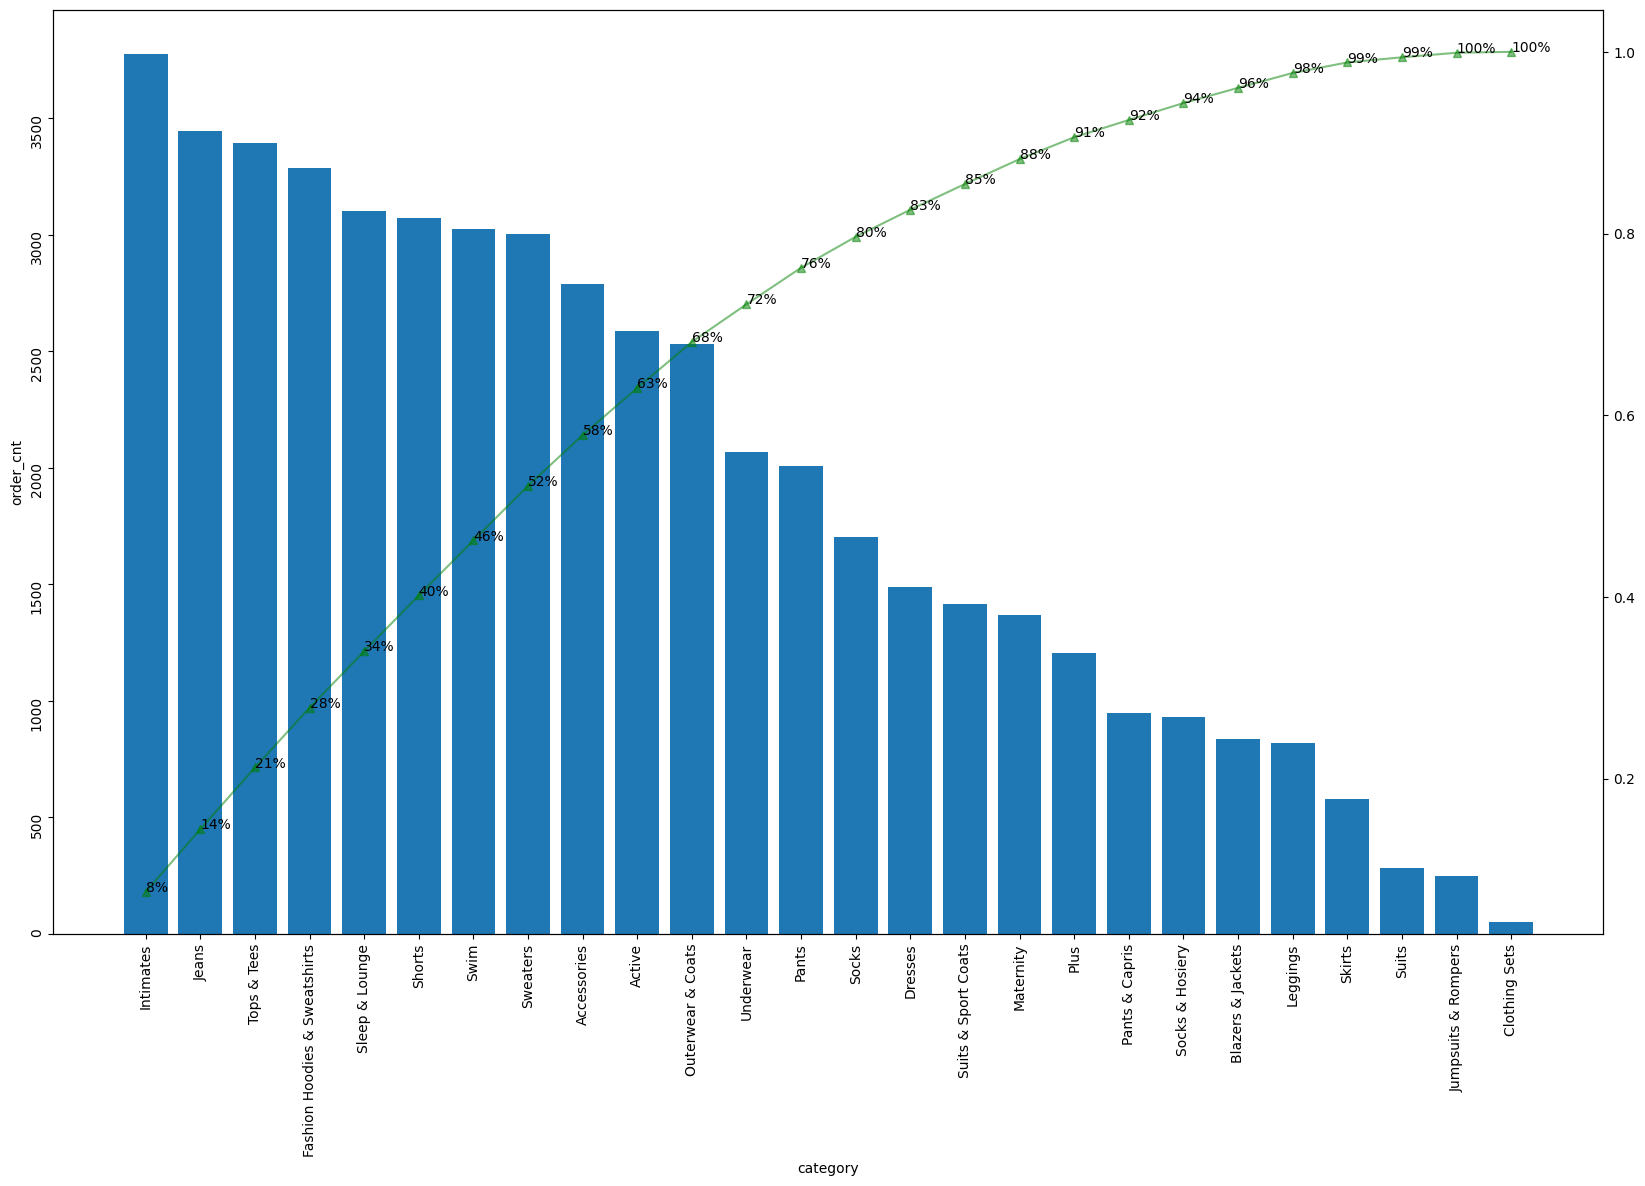

In [8]:
# 그래프 생성
fig, ax = plt.subplots(figsize=(20,12))
# 바차트 생성
ax.bar(x,y) 
# 라인 차트 생성
line_chart = ax.twinx()
line_chart.plot(x, ratio, '-g^', alpha=0.5)

# 라벨 지정
ax.set_xlabel('category')
ax.set_ylabel('order_cnt')

# %값 입력
ratio_sum_percent = ['{0:.0%}'.format(x) for x in ratio]
for idx, i in enumerate(ratio_sum_percent):
    line_chart.annotate(i, ([x[idx]], ratio[idx]))

# 축 회전
ax.tick_params(rotation=90)

plt.show()